## Scale of the Epidemics

Another problem we can ask is: how many people in the entire population will be infected if there is an epidemic outbreak?

In the long run, the infectious disease as modelled by the SIR equations would tend to the fixed points as we mentioned before, i.e., the number of the infective individuals would eventually drop to zero $\hat{I} \to \hat{I}_* = 0$, and all those who have been transimitted by the disease would have recovered, so the fraction of people who have ever caught the disease is $\hat{R}_\infty \equiv \lim_{\tau\to\infty}\hat{R}$.

As before we can use one single parameter to state the fixed point, but this time with a different choice of parameter. Since $\hat{S} + \hat{I} + \hat{R} = 1$, or $\hat{S}_\infty = 1 - \hat{R}_\infty$, so

$$ (\hat{S}_*, \hat{I}_*, \hat{R}_*) = (1 - \hat{R}_\infty, 0, \hat{R}_\infty)$$

Using the chain rule of differentiation, we have:

$$ \frac{\mathrm{d} \hat{S}}{\mathrm{d} \hat{R}} = \frac{\frac{\mathrm{d} \hat{S}}{\mathrm{d} \tau }}{\frac{\mathrm{d} \hat{R}}{\mathrm{d} \tau }} = \frac{-\mathcal{R}_0 \hat{S} \hat{I}}{\hat{I}} = -\mathcal{R}_0 \hat{S}$$

Again we arrive at a differential equation that can be solved by separating variables and integrating:

$$ \int_{\hat{S}_0}^{\hat{S}_\infty} \frac{\mathrm{d} \hat{S}}{\hat{S}} = -\mathcal{R}_0 \int_{\hat{R}_0}^{\hat{R}_\infty} \mathrm{d} \hat{R}$$

Setting the initial conditions: $\hat{S}_0 = 1$, $\hat{R}_0=0$, and substitute $\hat{S}_\infty = 1 - \hat{R}_\infty$:

$$ \ln \hat{S}\Big|_1^{1-\hat{R}_\infty} =  -\mathcal{R}_0 \hat{R}\Big|_0^{\hat{R}_\infty}$$

This can be simplified to an equation for $R_\infty$:

$$ \color{blue}{ 1 - \hat{R}_\infty - \mathrm{e}^{-\mathcal{R}_0 \hat{R}_\infty} = 0 }$$

For a particular value of $\mathcal{R}_0$, we can find a numerical solution to $\hat{R}_\infty$.

### Solving the equation for $R_\infty$

There is no analytical solution to the equation for $R_\infty$. However, we can use numerical methods to obtain a very good approximation to the exact solution.

The method that we are going to use is the *Newton-Raphson method*, as you should have learned about in A-Level mathematics. The spirit of this numerical method is, we can start off with some value as a guessed solution to the equation, then we attempt to improve the guess step by step, finally arriving at some value that is good enough for practical use.

For generality, let's say the equation to be solved takes the form $y = f(x) = 0$.

Suppose we take $x_0$ to be the approximate solution to the equation, but essentially $f(x_0)$ does not coincide with zero, so we look for room for improvement. We can do this by taking the line of tangent at $x_0$, where the line of tangent cuts the $x$-axis at a point, say $x_1$, that is closer to the true intercept than $x_0$.

The equation for the line of tangent at $x_0$ reads:

$$ y - f(x_0) = f'(x_0) (x - x_0) $$

Set $y=0$ and we find the $x$-intercept of this line to be:

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $$

Then we can adopt the similar procedures to $x_1$ to obtain an even better approximated solution $x_2$, and then get $x_3$, so on and so forth. This can be summarised by the iteration relation:

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

We can write some Python codes to do this. The sequence usually converges very quickly, so we can choose a small threshold value, say $\epsilon$, when the difference between $x_{n+1}$ and $x_n$ becomes smaller than $\epsilon$, we can consider the iteration process has already produced a pretty nice result to an accuracy within $\epsilon$.

Now turn to the equation for $R_\infty$:

$$ 1 - \hat{R}_\infty - \mathrm{e}^{-\mathcal{R}_0 \hat{R}_\infty} = 0$$

One has:

$$ f(\hat{R}_\infty) = 1 - \hat{R}_\infty - \mathrm{e}^{-\mathcal{R}_0 \hat{R}_\infty} \\
f'(\hat{R}_\infty) = -1 + \mathcal{R}_0 \mathrm{e}^{-\mathcal{R}_0 \hat{R}_\infty} $$

Therefore, iteration relation by Newton-Raphson method is given by:

$$ \hat{R}_{\infty,n+1} = \hat{R}_{\infty,n} - \frac{1 - \hat{R}_{\infty,n} - \mathrm{e}^{-\mathcal{R}_0 \hat{R}_{\infty,n}}}{-1 + \mathcal{R}_0 \mathrm{e}^{-\mathcal{R}_0 \hat{R}_{\infty,n}}} $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [13]:
def solve_R(R0, e):
    x = 1
    last_x = 0
    while abs(x - last_x) > e:
        numerator = 1 - x - math.exp(-R0*x)
        denominator = -1 + R0 * math.exp(-R0*x)
        x, last_x = x - numerator/denominator, x
    return x

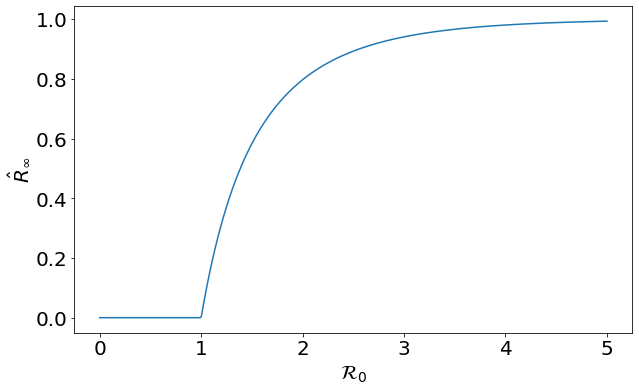

In [31]:
R0 = np.linspace(0, 5, 500)
R_infty = np.zeros_like(R0)
e = 1e-7

for i in range(len(R0)):
    R_infty[i] = solve_R(R0[i], e)

plt.plot(R0, R_infty)
plt.xlabel(r'$\mathcal{R}_0$')
plt.ylabel(r'$\hat{R}_{\infty}$')
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
plt.show()

The plot shows clearly that the spread of the disease is limited when $\mathcal{R}_0 < 1$. But as long as $\mathcal{R}_0$ gets beyond the threshold $1$, the size of affected population would dramatically increase.

## Evolution of Virulence

Bacteria and viruses continuously evolve due to selection pressures in their environments. They need to survive under the pressure of antibiotics, and also they compete directly with each other for available resources. This results in the evolution of virulence. In this section, we study this pheonomenon within the context of the SIR model.


Suppose the original virus has infection rate $\beta$ and recovery rate $\gamma$. We also introduce similiarly the death rate $c$ for the virus, indicating some probability that an unfortunate infectious individual might be killed by the virus. Now suppose there is a mutant virus, with the corresponding rates of $\beta'$, $\gamma'$ and $c'$. Since the virus may be fatal, so we cannot treat the size of the entire population as a constant. To make the model more realistic, we introduce the natural birth rate $b$ and natural death rate $f$ for the population.

Let's further assume that the original virus and the mutant virus have the same susceptible group $S$ and recovered group $R$, i.e., any susceptible individual can be transmitted by any one of the two viruses, and anyone who has recovered from the virus would be immune to both viruses. Denote the infective group that carry the original virus by $I$ and the group that carry the mutant virus by $I'$, then the change of the size of each group in our model can be described by the following equations:

$$
\begin{aligned}
\frac{\mathrm{d} S}{\mathrm{d} t} &= bN - dS - S (\beta I + \beta' I') & \qquad (1)\\
\frac{\mathrm{d} I}{\mathrm{d} t} &= \beta S I - (\gamma + c + f) I & \qquad (2)\\
\frac{\mathrm{d} I'}{\mathrm{d} t} &= \beta' S I' - (\gamma' + c' + f) I & \qquad (3)\\
\frac{\mathrm{d} R}{\mathrm{d} t} &= \gamma I + \gamma' I' - fR & \qquad (4)\\
\end{aligned}
$$

According to our setting, the initial state is at the fixed point when only the original virus is present, i.e., $\frac{\mathrm{d} S}{\mathrm{d} t} = \frac{\mathrm{d} I}{\mathrm{d} t} = \frac{\mathrm{d} R}{\mathrm{d} t} = 0$ with $I_* \neq 0$. Then by equation $(2)$, the size of susceptible group around the fixed point should satisfy:

$$ \beta S_* I_* - (\gamma + c + f) I_* = 0 \quad \Rightarrow \quad S_* = \frac{\gamma + c + f}{\beta} $$

If there now emerges some cases of mutant virus, we can study how the system would evolve by introducing a small $I'$ around the fixed point. Plug the equation for $S_*$ into $(3)$:

$$
\begin{aligned}
\frac{\mathrm{d} I'}{\mathrm{d} t} &= \beta' \cdot \frac{\gamma + c + f}{\beta} \cdot I' - (\gamma' + c' + f) I' \\
\frac{\mathrm{d} I'}{\mathrm{d} t} &= \left[ \frac{\beta'}{\beta} (\gamma + c + f) - (\gamma' + c' + f) \right] I'
\end{aligned}$$

The solution of the equation looks like:

$$ I' = I_0' \mathrm{e}^{\lambda t} \qquad (5)$$

If $\lambda \equiv \frac{\beta'}{\beta} (\gamma + c + f) - (\gamma' + c' + f)  > 0$, $I'$ will grow exponentially, i.e., the mutant virus will spread and take the place of the original virus.

After some algebra, the condition $\lambda >0$ can be rewritten as:

$$ \color{blue}{ \frac{\beta'}{\gamma' + c' + f} > \frac{\beta}{\gamma + c + f} }$$

This inequality actually makes quite a lot of sense. If the virus manages to archieve one or more of the following features, then the mutant virus could be more competent and spread wildly.

- $\beta' > \beta$: This means the mutant virus has a higher probability of transmission, a naive conclusion that you can draw even without mathematical modelling.

- $\gamma' < \gamma$: This means it becomes harder to quickly recover from the mutant virus. As a consequence, an infectious individual would carry the virus for a longer time, transmitting the virus to a greater number of potential victims.

- $c' < c$: This means the mutant virus is less deadly. The reason is simple, as if a patient dies, then he/she has no chance to transmit the virus to other people, so end of story for the transimission chain.

In summary, we can conclude from the SIR model that the virus tend to evolve to become more easily transmitted between people, make people sick longer but get less deadly. In some sense, the evolution path would like that the virus wants to co-exist with humans.

However, we shall keep in mind that a virus in the real would could mutate to have several features changed at the same time. The most formidable situation could be an increase in both the death rate and transmission abilitiy, with the increase in death rate higher than the increase in transmission rate, so that the condition that $\lambda >0$ is still satisfied. But in this case, the more deadly mutant virus is able to transmit more quickly, potentially leading to a more widespread disaster.